In [66]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.special as spc
import functools as ftl

Suppose that there are $l$ sequences len $m$ whose elements satisfy:
$$\forall e \in sequnce,\  e\in\{0, 1, ..., t\}, and\ sequnce\ is\ random$$
Let random variance $X$='number of 0 in sequence', where $X={0, 1, ..., m}$. So $X\sim \mathcal{B}(l, {1\over t})$. 

[ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.01  0.1   0.15  0.42  0.91  1.88  2.93  4.02  6.3   7.8   9.44
 10.69 11.75 11.    9.11  7.74  5.82  4.34  2.52  1.61  0.8   0.37  0.19
  0.04  0.04  0.    0.01  0.01  0.    0.    0.    0.    0.    0.    0.
  0.    0.  ]


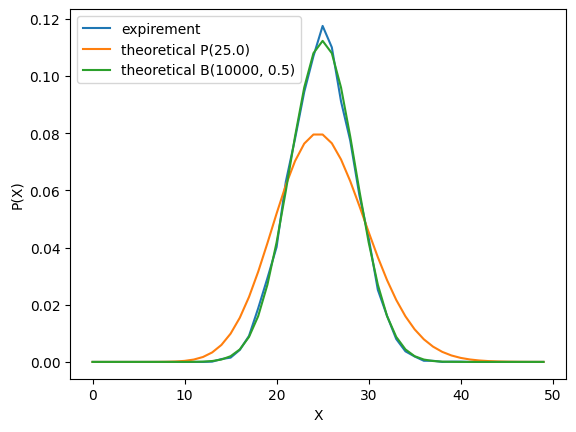

In [67]:
def expir1(m, l, t=2):
    sq = [np.random.randint(0, t) for _ in range(l*m)]

    X = np.zeros(m)  # random variance
    for i in range(l):
        cnt_0 = 0
        for j in range(m):
            if sq[i*m + j] == 0:
                cnt_0 += 1
        X[cnt_0] += 1
    X = X / np.sum(X)
    return X

m, l, t = 50, 10000, 2
lam = m/t
X = expir1(m, l)


np.set_printoptions(precision=4, suppress=True)
print(f'{X*100}')
plt.plot(range(len(X)), X, label='expirement')
plt.plot(range(len(X)), [lam**k / math.factorial(k) * np.exp(-lam) for k in range(m)], label=f'theoretical P({lam})')
plt.plot(range(len(X)), [spc.comb(len(X), k) * (1/t)**k * (1 - 1/t)**(len(X) - k) for k in range(len(X))], label=f'theoretical B({l}, {1/t})')
plt.xlabel('X')
plt.ylabel('P(X)')
plt.legend()
plt.show()

Given a sorted real number sequence, whose elements satisfy: 
$$
\forall x \in sequnce,\ represented\ by\ X, X\sim U(0, 1)
$$
and now we want to divide the $[0, 1]$ interval in to $l$ parts, and make sure the average of numbers in each sub-interval is $\lambda$, so if we let random variance $Y$ = 'the number of real numbers in each sub-interval', we get: 
$$
Y\sim \mathcal{P}(\lambda)
$$


In [68]:
def expir2(lam, l):
    size = int(lam*l)

    sp = np.random.uniform(0, 1, size=size)
    sp = np.sort(sp)
    X = np.zeros(4*int(lam) + 1)  # random variance
    dis = 1 / l
    def count(a, b):
        lower_index = np.searchsorted(sp, a, side='left')
        upper_index = np.searchsorted(sp, b, side='right')
        return upper_index - lower_index

    for i in range(l):
        cnt = count(i*dis, (i+1)*dis)
        if cnt >= len(X):
            X[-1] += 1
        else:
            X[cnt] += 1

    X = X / np.sum(X)
    return X


[ 1.62  6.81 13.68 18.89 19.53 16.06 11.33  6.19  3.24  1.54  0.74  0.27
  0.05  0.03  0.01  0.01  0.  ]


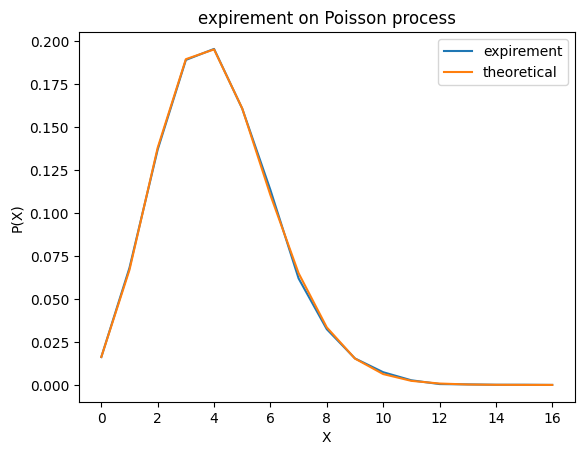

In [69]:
lam = 4.12  # average per unit interval
num = 10000

X = expir2(lam=lam, l=num)
np.set_printoptions(precision=4, suppress=True)
print(f'{X*100}')
plt.plot(range(len(X)), X, label='expirement')
plt.plot(range(len(X)), [lam**k / math.factorial(k) * np.exp(-lam) for k in range(len(X))], label='theoretical')
plt.title('expirement on Poisson process')
plt.xlabel('X')
plt.ylabel('P(X)')
plt.legend()
plt.show()

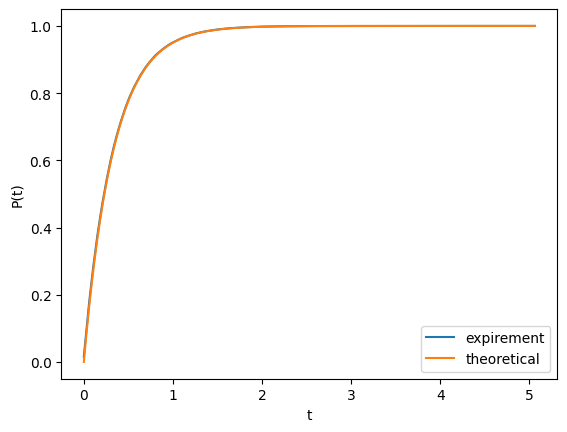

In [72]:
lam = 3
Sup = 1000

timelist = []
for _ in range(100000):
    sp = np.random.uniform(0, Sup, size=lam*Sup)
    sp = np.sort(sp)
    timelist.append(sp[0])

timelist = np.sort(timelist)

def toh(lis, intervals=10):
    lis = np.sort(lis)
    min, max = lis[0], lis[-1]
    step = (max - min) / intervals
    res = []

    for i in range(intervals):
        l = min + i * step
        r = min + (i + 1) * step
        lower_index = np.searchsorted(lis, l, side='left')
        upper_index = np.searchsorted(lis, r, side='right')
        num = upper_index - lower_index
        res.append(num)

    res = res / np.sum(res)
    res = [np.sum(res[:i+1]) for i in range(len(res))]
    return res

expr = toh(timelist, intervals=1000)

plt.plot(np.linspace(timelist[0], timelist[-1], len(expr)), expr, label='expirement')
plt.plot(np.linspace(timelist[0], timelist[-1], 1000), [1 - np.e**(-lam*t) for t in np.linspace(timelist[0], timelist[-1], 1000)], label='theoretical')
plt.xlabel('t')
plt.ylabel('P(t)')
plt.legend()
plt.show()